## Bayes classifier as generative model

In [8]:
from scipy.stats import multivariate_normal as mvn
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# class Y from 0 to n-1

class BayesClassifier(object):
    
    gaussians = []
    classes = 10
    p = np.zeros(10)
    
    def fit(self,X, Y):
        for i in range(self.classes):
            X_data = X[Y == i]
            self.p[i] = len(X_data)
            mean = X_data.mean(axis=0)
            cov = np.cov(X_data.T)
            g = {'m':mean,'c':cov}
            self.gaussians.append(g)
        self.p /= self.p.sum()
        
    def generate_sample_y(self,y):
        g = self.gaussians[y-1]
        return mvn.rvs(mean=g['m'], cov=g['c'])
    
    def generate_sample(self):
        cls = np.random.choice(self.classes, p=self.p)
        return self.generate_sample_y(cls) 

In [10]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
test = x_train.reshape(x_train.shape[0], -1)

In [12]:
test = test/255

In [13]:
clf = BayesClassifier()
clf.fit(test, y_train)

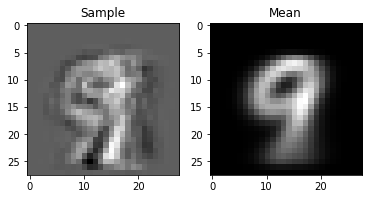

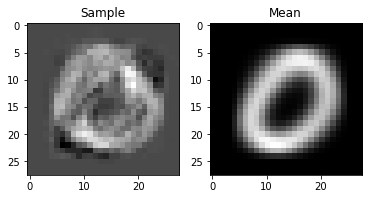

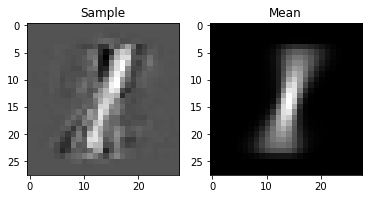

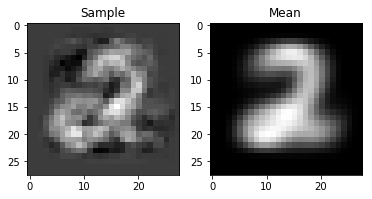

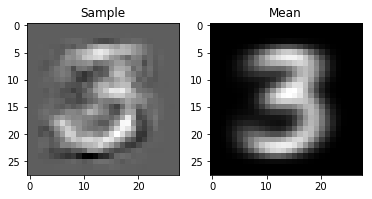

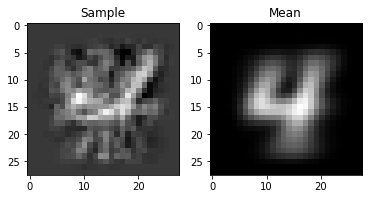

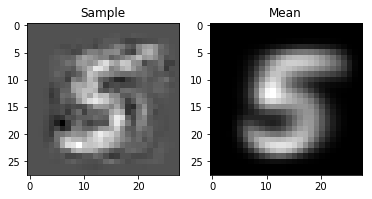

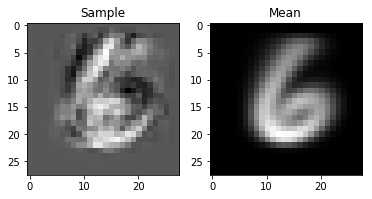

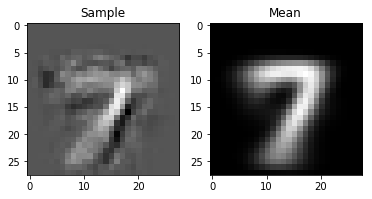

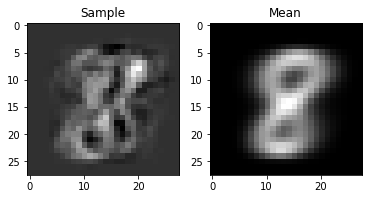

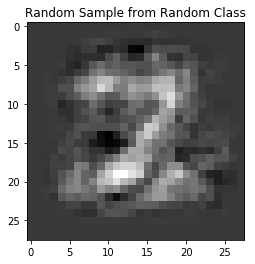

In [14]:
for k in range(clf.classes):
    # show one sample for each class
    # also show the mean image learned

    sample = clf.generate_sample_y(k).reshape(28, 28)
    mean = clf.gaussians[k-1]['m'].reshape(28, 28)

    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

# generate a random sample
sample = clf.generate_sample().reshape(28, 28)
plt.imshow(sample, cmap='gray')
plt.title("Random Sample from Random Class")
plt.show()

## variational inferences GMM to calculate mean and cov

In [1]:
from scipy.stats import multivariate_normal as mvn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

In [2]:
class Classifier(object):
    
    gaussians = []
    classes = 10
    p = np.zeros(10)
    
    def fit(self,X, Y):
        for i in range(self.classes):
            X_data = X[Y == i]
            g = BayesianGaussianMixture(10)
            g.fit(X_data)
            self.gaussians.append(g)
        self.p /= self.p.sum()
        
    def generate_sample_y(self,y):
        g = self.gaussians[y-1]
        sample = g.sample()
        mean = g.means_[sample[1]]
        return sample[0].reshape(28,28), mean.reshape(28,28)
    
    def generate_sample(self):
        cls = np.random.choice(self.classes, p=self.p)
        return self.generate_sample_y(cls) 

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [4]:
test = x_train.reshape(x_train.shape[0], -1)

In [5]:
test = test/255

In [6]:
clf = Classifier()
clf.fit(test, y_train)

C:\Users\Born_2_Code\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


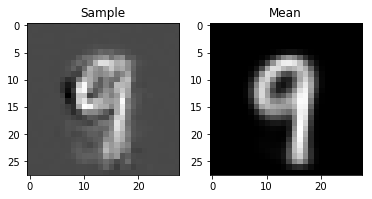

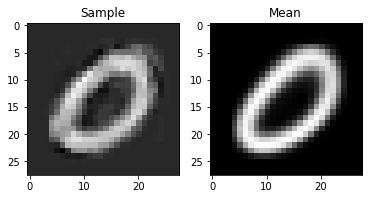

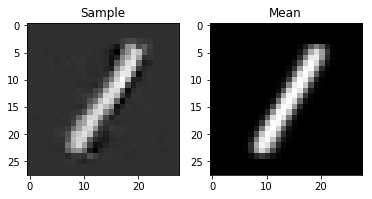

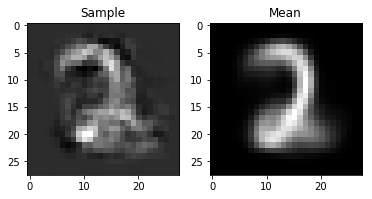

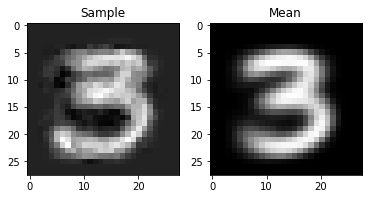

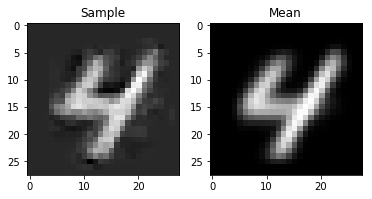

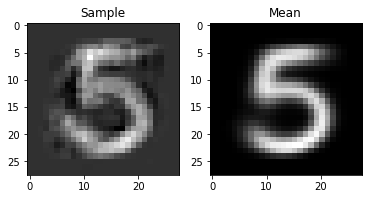

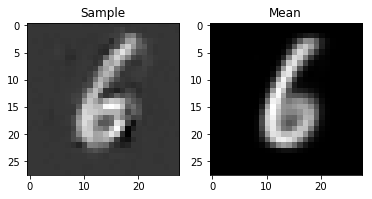

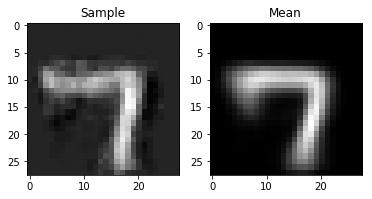

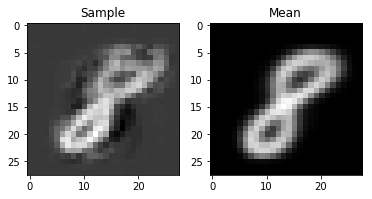

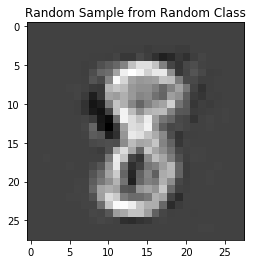

In [7]:
for k in range(clf.classes):
    # show one sample for each class
    # also show the mean image learned

    sample, mean = clf.generate_sample_y(k)

    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

# generate a random sample
sample, mean = clf.generate_sample_y(k)
plt.imshow(sample, cmap='gray')
plt.title("Random Sample from Random Class")
plt.show()